<h3><b>Introduction to Data Analytics - Exercise set 4, exercise 4</b></h3>

<h4><b>Youtube channel popularity dataset</b></h4>
<img src="http://srv.plab.fi/~tuomasv/data_analytics_2023_images/exercise_set_4/youtube.png" />

<b>Tip:</b> You can just click "Run All" to see the results of this notebook. Some of these exercises have some heavy plots that can take even 1 minute to produce.

<b>Remember:</b> not every dataset has interesting correlations and/or features (too much randomness or variance usually, or not enough data, or data is just self-explanatory). Also, not each correlation implies there's a causation. Finally, not every plot is useful, that's why it's important to try multiple plots in order to "see under the hood". Typically pair plots, joint plots, regression plots, heatmaps and box plots are most useful, but there are some exceptions too.

<h3><b>Quick summary of data:</b></h3>

<p>This dataset contains information on most popular / subscribed YouTube channels. The data includes the channel rank, amount of subscribers, video count, video views, YouTuber/channel name, category and the year the channel started.</p>

<p>Original data: <a href="https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels">https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels</a></p>

<h3><b>Questions for this exercise:</b></h3>
<b>Answer the questions either as code comments or as markdown. Use separate cells to write your answers.</b><br/><br/>
<li>What features seem to affect the popularity of a YouTube channel?</li>
<li>Can we determine the "formula" on how to be successful in YouTube based on this data? Which columns affect the popularity the most?</li>

<b>Extra questions/tasks for extra points:</b>
<li>What characteristics different YouTube channel categories seem to have on different columns?</li>
<li>Any other ideas about this dataset? Any ways to expand or improve the dataset and the analysis?</li>


<hr />

<h4><b>Imports and load the original dataset</b></h4>

In [1]:
# import the common data analytics modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h4><b>Helper functions for data clean-up</b></h4>

In [2]:
# helper function that takes care of some messed category names 
# that contain a URL instead of an actual category
def fix_category(row):
    category = row['Category']

    if "https" in category:
        return "Other"
    else:
        return category

<h4><b>Data processing</b></h4>

In [3]:
# load the dataset
df = pd.read_csv("youtube.csv")

# clean up the subscribers, video views and video count  -columns
df['Subscribers'] = df['Subscribers'].str.replace(",", "").astype("int64")
df['Video Views'] = df['Video Views'].str.replace(",", "").astype("int64")
df['Video Count'] = df['Video Count'].str.replace(",", "").astype("int64")

df['Category'] = df.apply(fix_category, axis=1)

# remove channels without videos and videos that are marked before YouTube existed (faulty data)
df = df[df['Video Count'] > 0]
df = df[df['Started'] > 2000]

# adding a new column, does average video view per amount of subscribers affect the analysis?
df['views_per_sub'] = df['Video Views'] / df['Subscribers']

# filter out 6 most common categories
categories = list(df['Category'].value_counts().index)
common_categories = categories[0:6]

# filter out only common categories
df2 = df[df['Category'].isin(common_categories)].copy()

# save correlations for further inspecting
correlations = df.corr(numeric_only=True)
correlations2 = df2.corr(numeric_only=True)

<h4><b>seaborn plots - pair plots</b></h4>

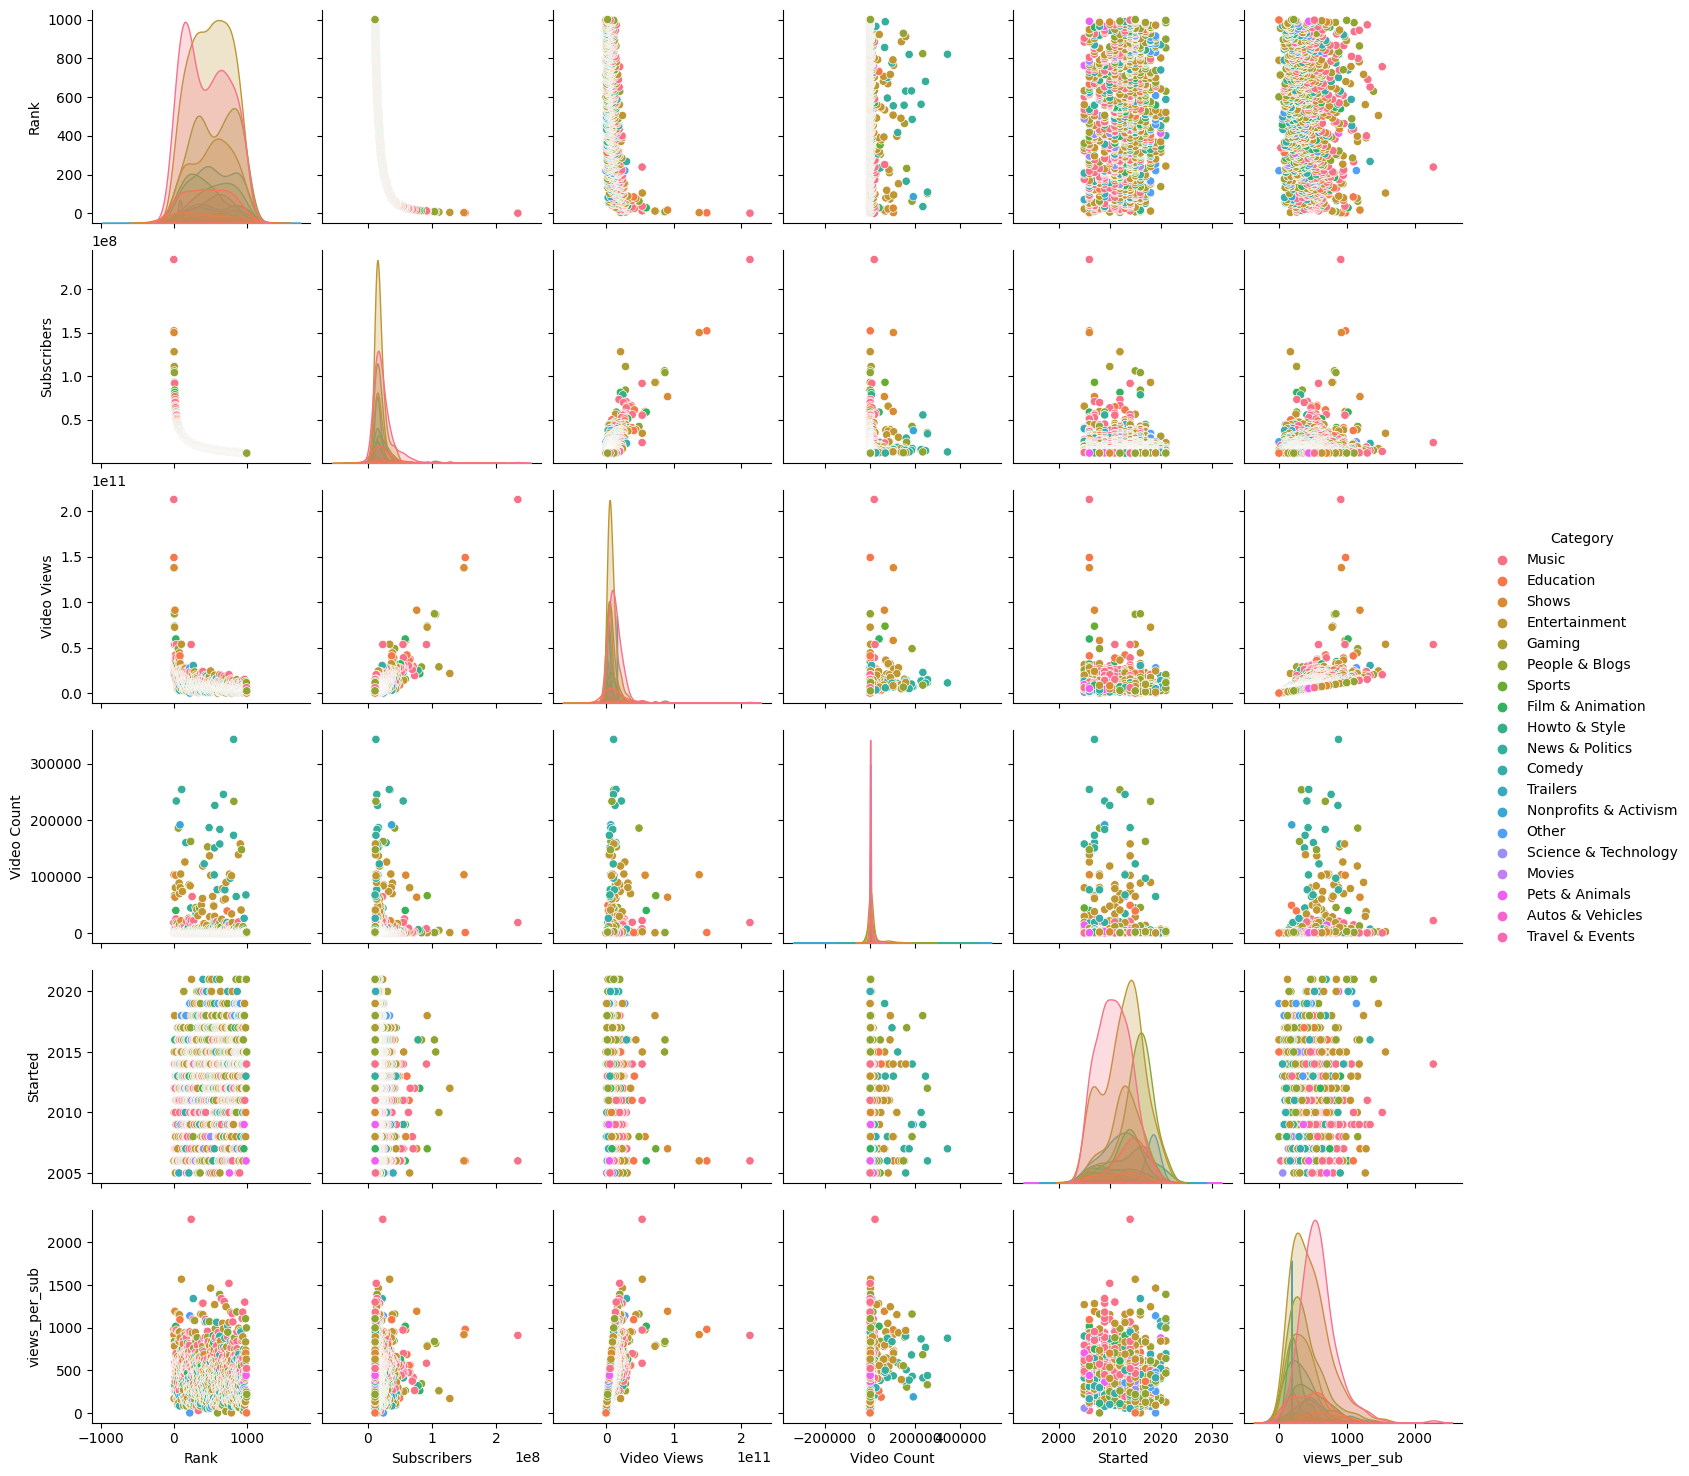

In [4]:
# pairplot, hue on category, original dataset
sns.pairplot(df, hue='Category')

# not useful

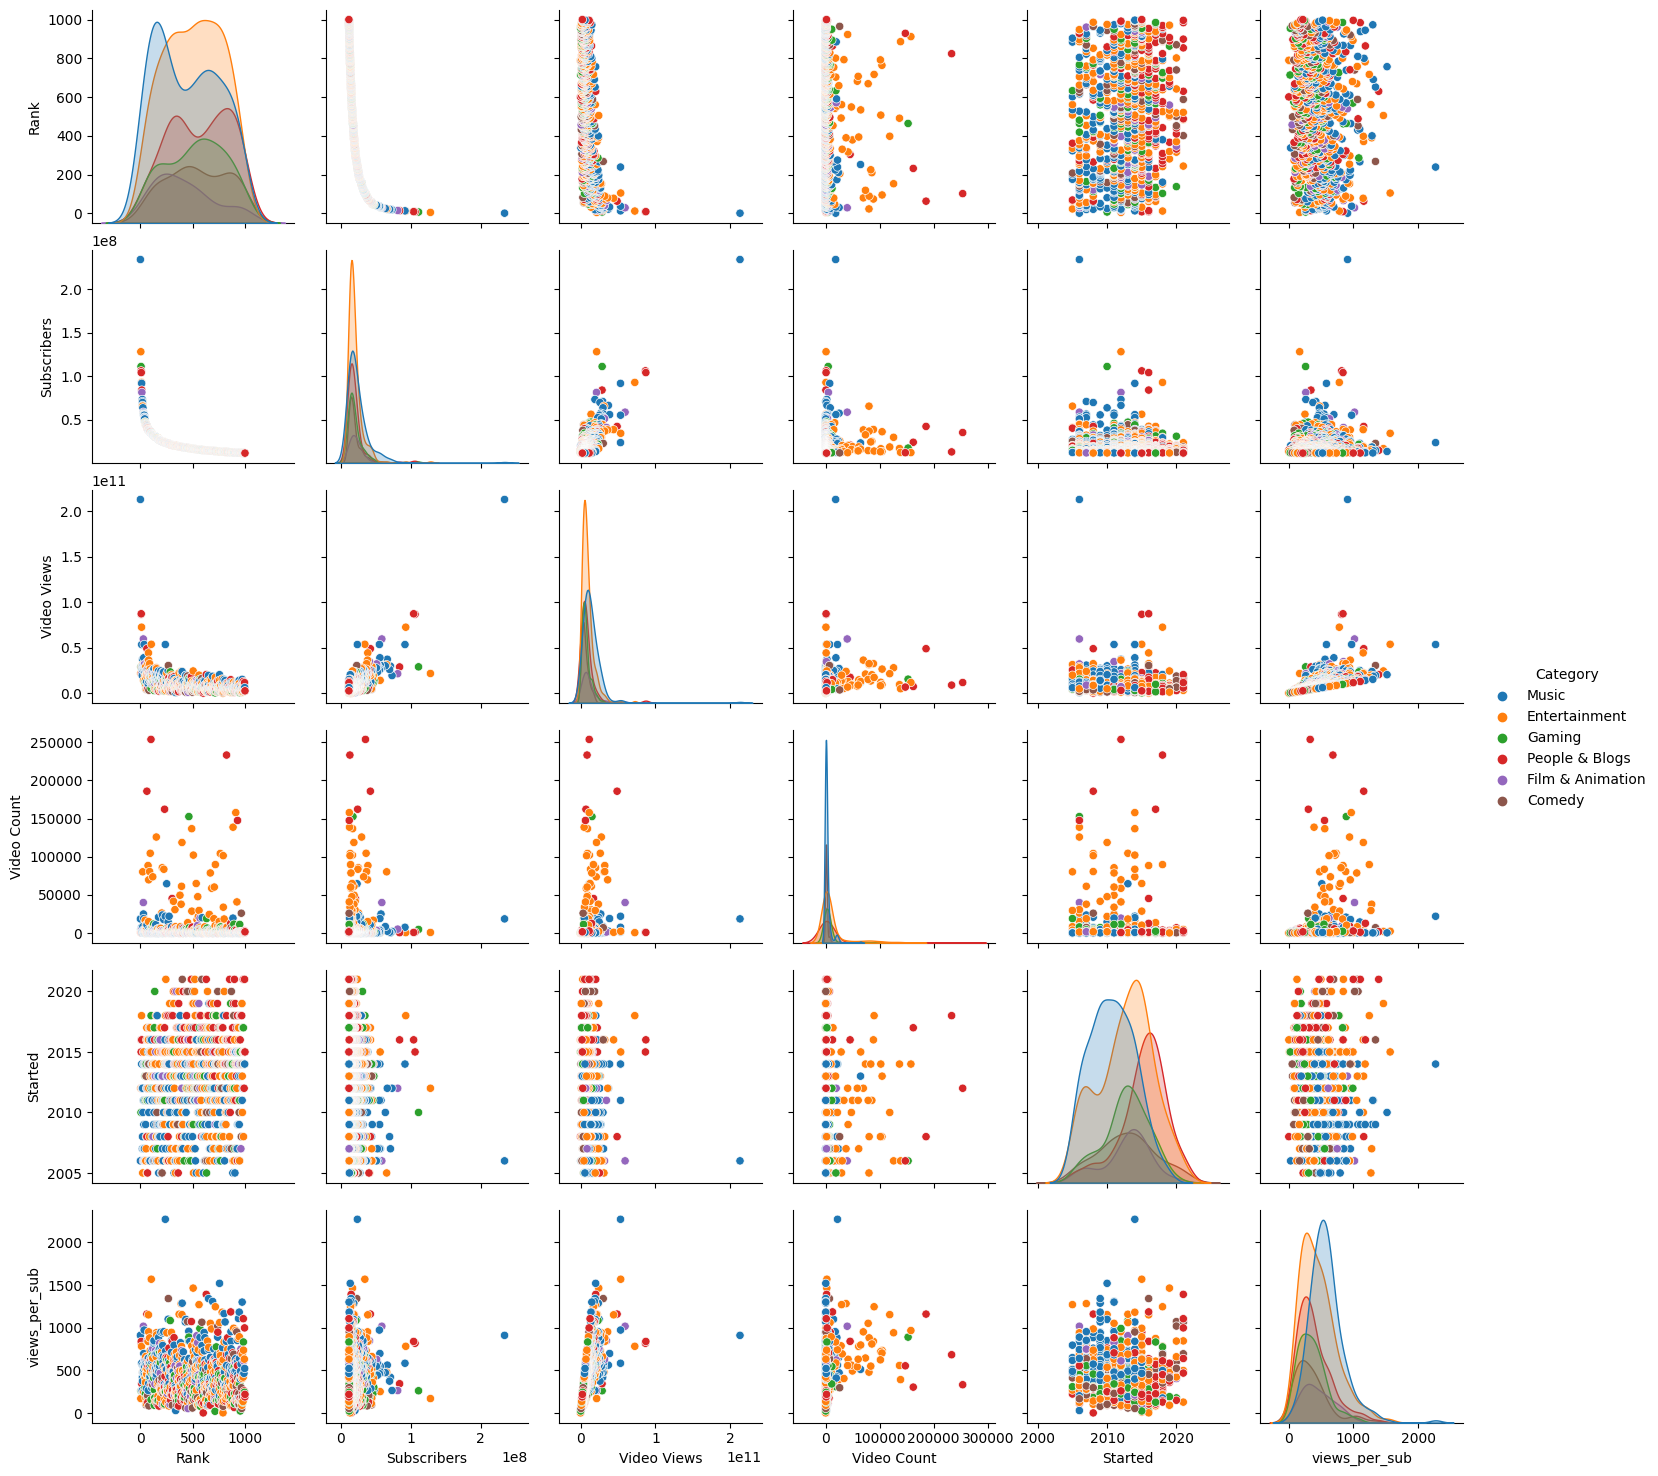

In [5]:
# pairplot, hue on category, filtered dataset (most common categories only)
sns.pairplot(df2, hue='Category')

# not useful

<h4><b>seaborn plots - linear regression plots</b></h4>

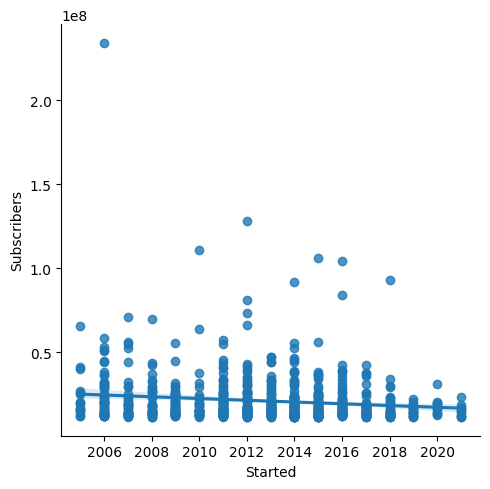

In [6]:
# linear regression plot, Start year and Subscribers
sns.lmplot(x='Started', y='Subscribers', data=df2)

# I'm not able to identify any discernible relationship between the year and the number of subscribers.

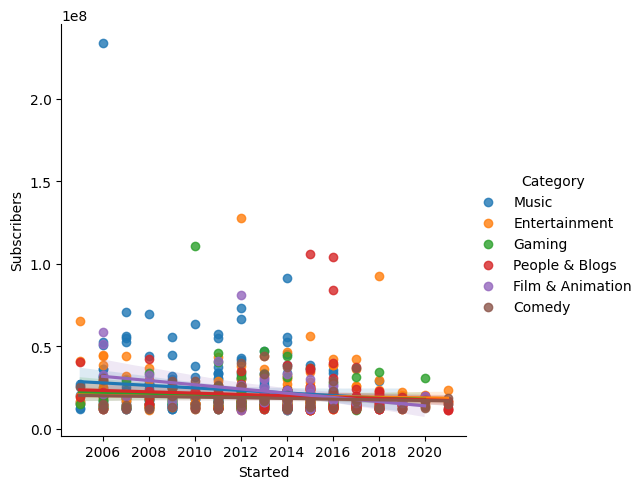

In [7]:
# linear regression plot, Start year and Subscribers, hue on category
sns.lmplot(x='Started', y='Subscribers', data=df2, hue="Category")

# The linear regression plot is not entirely clear, likely due to the mixed colors used.
# However, it is evident that the music category has significantly more followers than the other categories.
# Conversely, the comedy category appears to have fewer followers and is positioned towards the bottom of the graph.


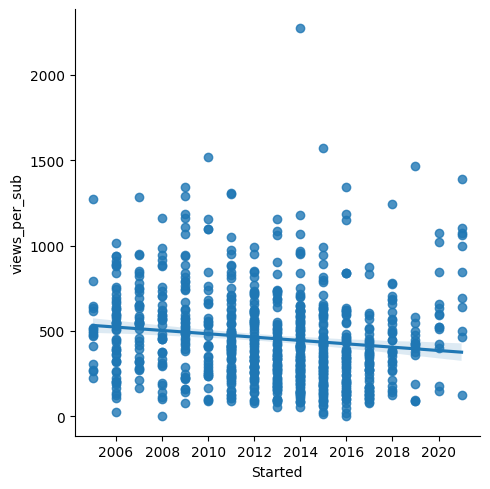

In [8]:
# linear regression plot, Start year and views per subscriber
sns.lmplot(x='Started', y='views_per_sub', data=df2)

# i see the decrease trend,indicating that people are watching less YouTube over time.
# it could be because of succes of athother streaming platforms and social networks


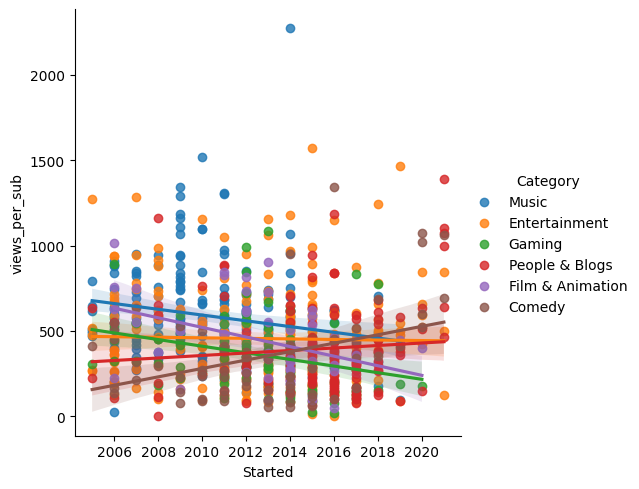

In [9]:
# linear regression plot, Start year and views per subscriber, hue on category
sns.lmplot(x='Started', y='views_per_sub', data=df2, hue="Category")

# here is clearly see that some categories stable decrease (music, gaming, film)
# I think because of competitors like spotify, twitch and netflix can lure the audience

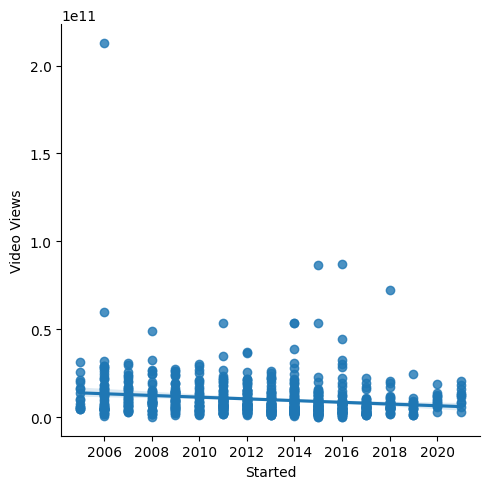

In [42]:
# linear regression plot, Start year and video view count
sns.lmplot(x='Started', y='Video Views', data=df2)

# it look like nowadays it is more dificult for chanals to have views 

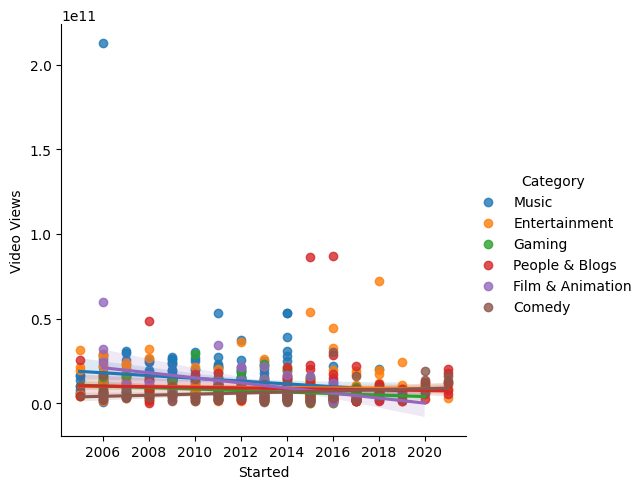

In [11]:
# linear regression plot, Start year and video view count, hue on category
sns.lmplot(x='Started', y='Video Views', data=df2, hue="Category")

# okay, here we see categories, musical videos were such popular 2006

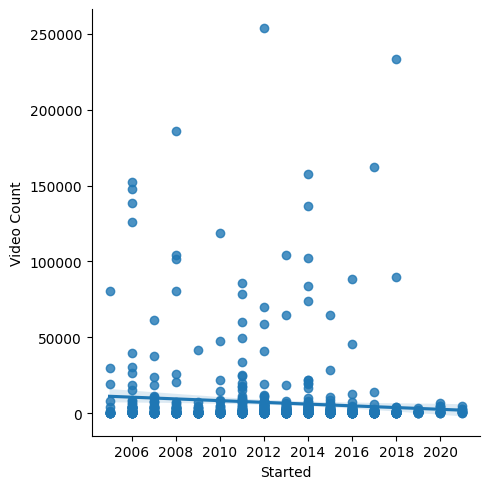

In [12]:
# linear regression plot, Start year and video count
sns.lmplot(x='Started', y='Video Count', data=df2)

# The plot displays a notable trend where the number of videos produced by bloggers decreased after 2018. 
# This decrease could potentially impact the amount of views per subscriber, 
# as less interesting content may receive fewer views. It would be worthwhile to investigate whether there is 
# a correlation between the decrease in video production and the potential decrease in views per subscriber.

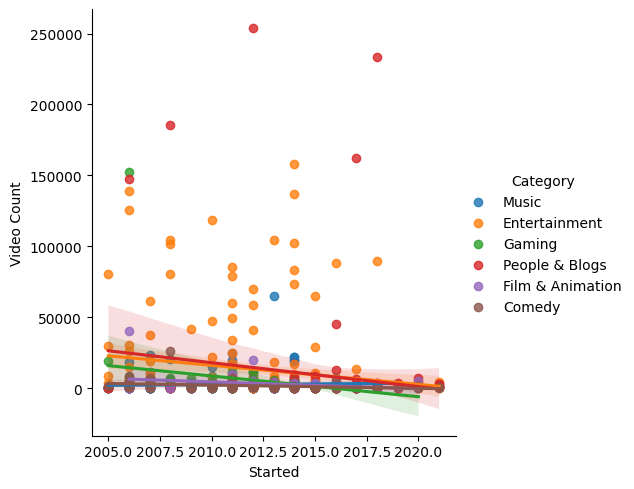

In [13]:
# linear regression plot, Start year and video count, hue on category
sns.lmplot(x='Started', y='Video Count', data=df2, hue="Category")

# The data shows that bloggers produced a higher number of videos 
# in the entertainment category compared to other categories. However, there were 
# some outliers in the People & Blogs category. If someone wants to create a popular YouTube channel, 
# it may be beneficial to create videos 
# in the entertainment category, based on the observed trend in production volume.

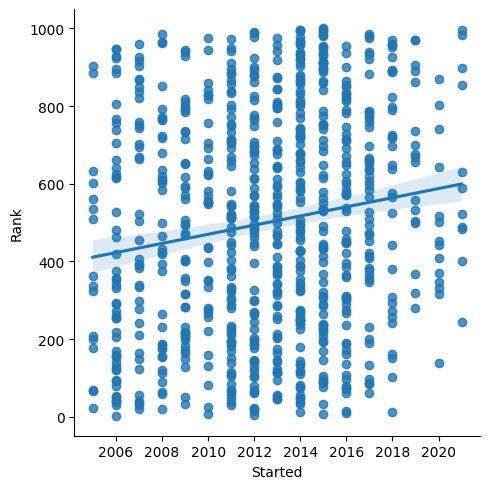

In [14]:
# linear regression plot, Start year and rank
sns.lmplot(x='Started', y='Rank', data=df2)

# unuseful

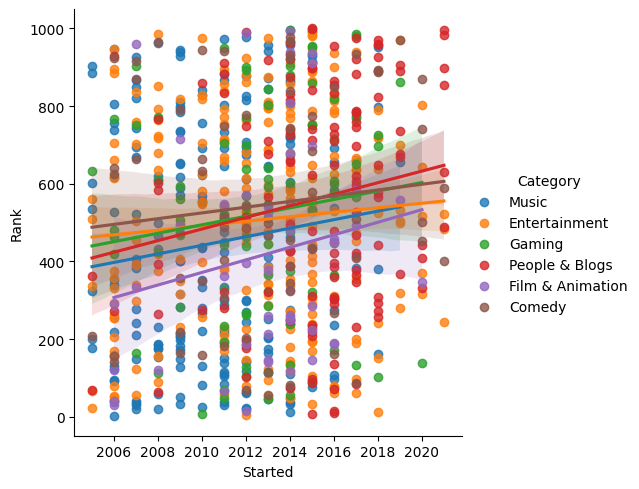

In [15]:
# linear regression plot, Start year and rank, hue on category
sns.lmplot(x='Started', y='Rank', data=df2, hue="Category")

# The analysis indicates that the Entertainment and People & Blogs 
# categories have consistently been ranked higher than other categories. 
# Therefore, creating videos in these two categories may increase the chances of becoming popular.

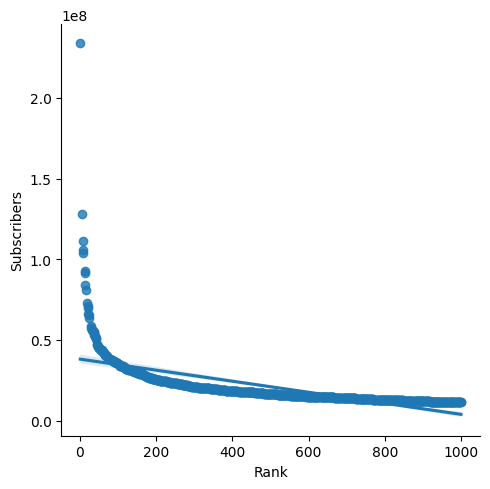

In [16]:
# linear regression plot, Rank and subscribers
sns.lmplot(x='Rank', y='Subscribers', data=df2)

# The plot suggests that obtaining a larger number of subscribers is challenging, 
# which may explain why bloggers with fewer subscribers tend to have higher ranks. 
# The data indicates that there are more small bloggers in total, which could contribute to the observed trend.

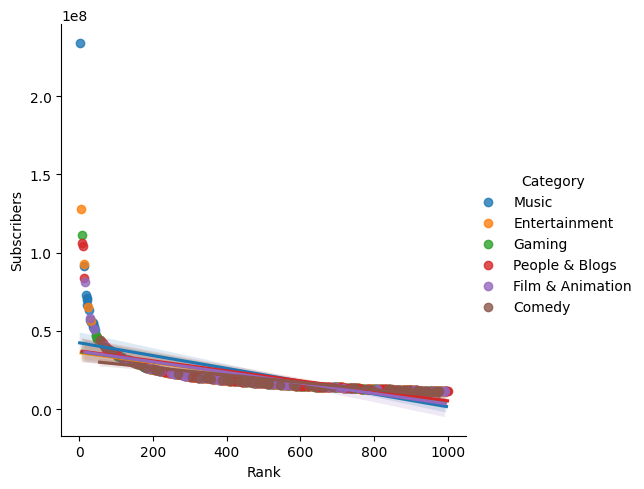

In [17]:
# linear regression plot, Rank and subscribers, hue on category
sns.lmplot(x='Rank', y='Subscribers', data=df2, hue="Category")

# unusefull

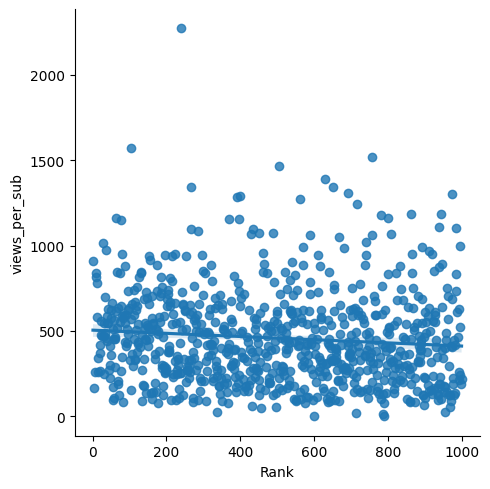

In [18]:
# linear regression plot, Rank and views per subscribers
sns.lmplot(x='Rank', y='views_per_sub', data=df2)

# unuseful

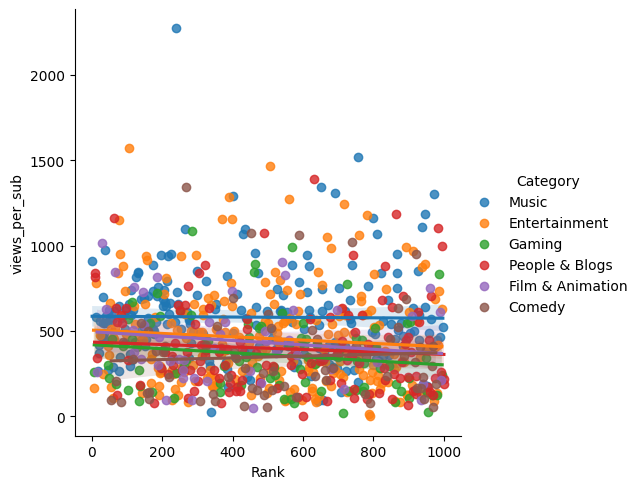

In [19]:
# linear regression plot, Rank and views per subscribers, hue on category
sns.lmplot(x='Rank', y='views_per_sub', data=df2, hue="Category")

# The current plot shows that the Music and Entertainment category is ranked at the top

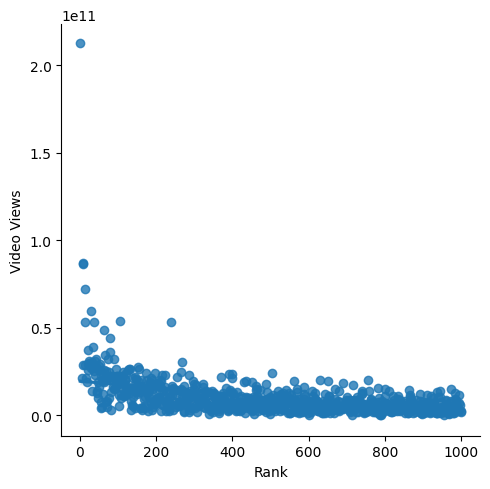

In [20]:
# linear regression plot, Rank and video view count
sns.lmplot(x='Rank', y='Video Views', data=df2)

# not useful

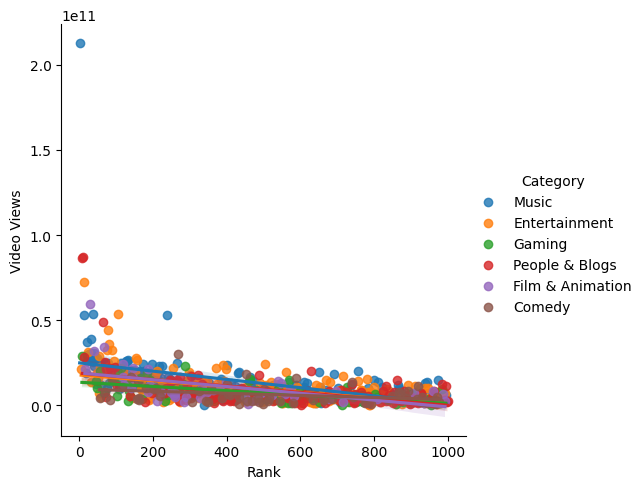

In [21]:
# linear regression plot, Rank and video view count, hue on category
sns.lmplot(x='Rank', y='Video Views', data=df2, hue="Category")

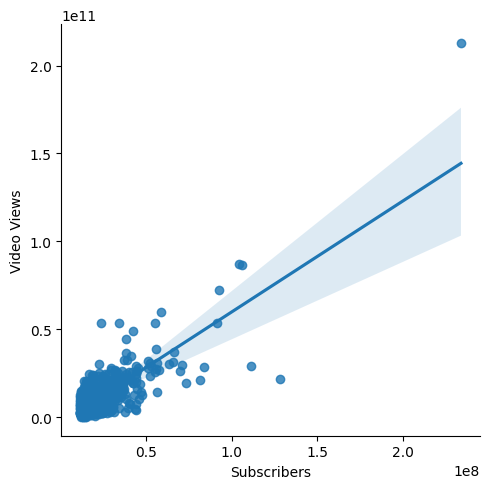

In [22]:
# linear regression plot, Rank and video view count, hue on category
sns.lmplot(x='Subscribers', y='Video Views', data=df2)

# not useful

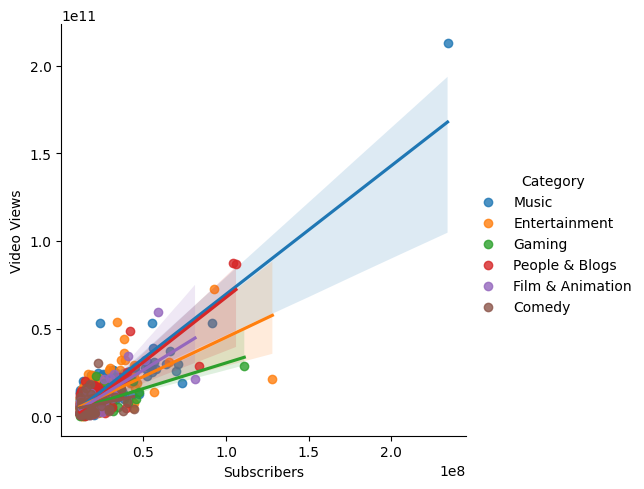

In [23]:
# linear regression plot, Rank and video view count, hue on category
sns.lmplot(x='Subscribers', y='Video Views', data=df2, hue="Category")

# more Views = more Subscribes, but here i do not see this correlation, looks like unuseful plot

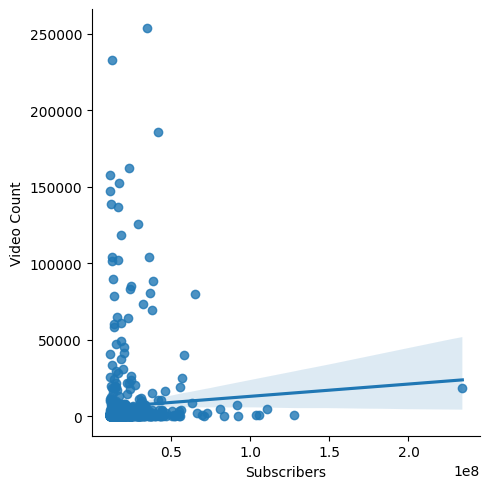

In [24]:
# linear regression plot, Rank and video count, hue on category
sns.lmplot(x='Subscribers', y='Video Count', data=df2)

# The data suggests that there is no significant correlation between the number of videos produced and the number of subscribers gained. In other words, 
# producing more videos does not necessarily result in a higher number of subscribers.

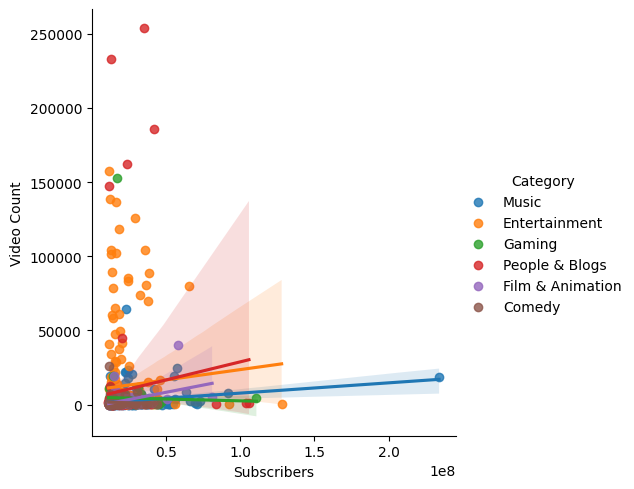

In [25]:
# linear regression plot, Rank and video count, hue on category
sns.lmplot(x='Subscribers', y='Video Count', data=df2, hue="Category")

# same conclusions

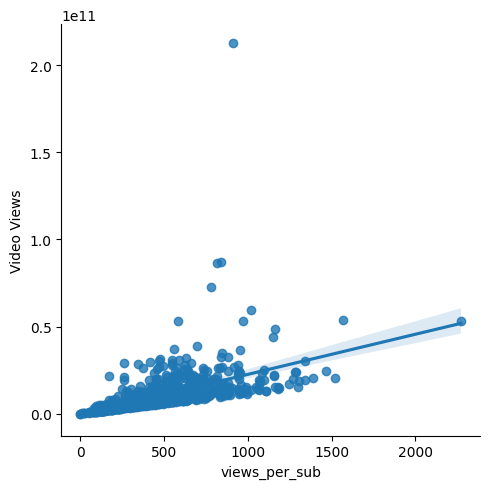

In [26]:
# linear regression plot, views per subscribers and video views
sns.lmplot(x='views_per_sub', y='Video Views', data=df2)

# it look like subscribers can wath almost videos of chanal

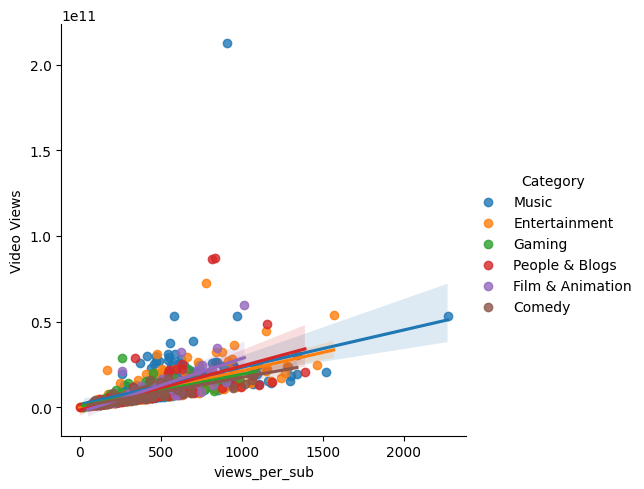

In [27]:
# linear regression plot, views per subscribers and video views, hue on category
sns.lmplot(x='views_per_sub', y='Video Views', data=df2, hue="Category")

# same plot

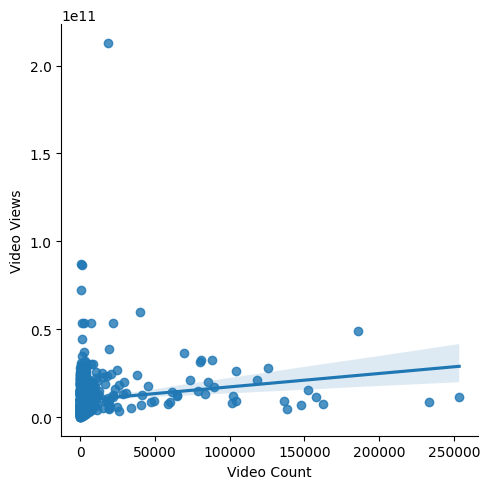

In [28]:
# linear regression plot, video count and video views
sns.lmplot(x='Video Count', y='Video Views', data=df2)

# not useful

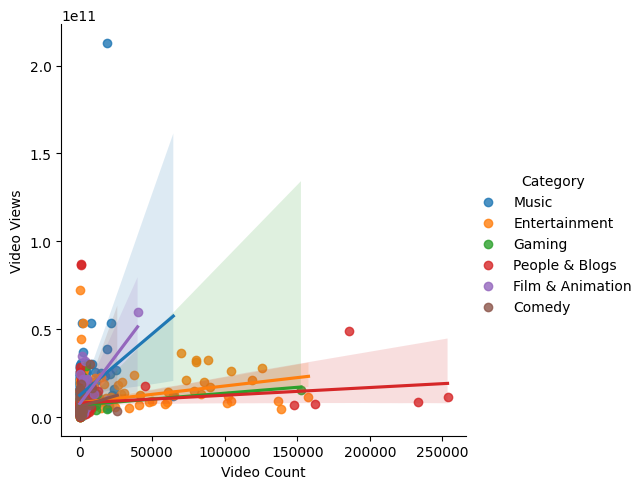

In [29]:
# linear regression plot, video count and video views, hue on category
sns.lmplot(x='Video Count', y='Video Views', data=df2, hue="Category")

# unuseful, dirty

<h4><b>seaborn plots - box plots</b></h4>

In [30]:
# helper function that combines years to make it easier to use box plot
# data is between 2005 and 2021
def combine_years(row):
    year = int(row['Started'])

    if 2005 <= year < 2009:
        return 2005.2009
    elif 2009 <= year < 2013:
        return 2009.2013
    elif 2013 <= year < 2017:
        return 2013.2017
    else:
        return 2017.2021
    
    
# create column    
df2['year_span'] = df2.apply(combine_years, axis=1)

<AxesSubplot: xlabel='Category', ylabel='Rank'>

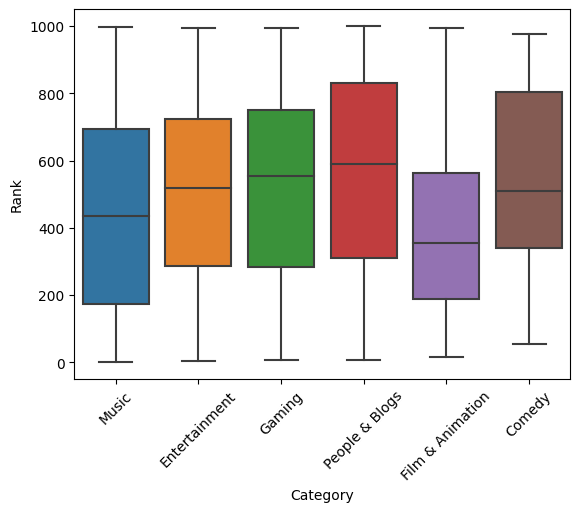

In [31]:
# box plot on category and rank, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='Rank', data=df2)

# The plot displays that the People & Blogs category is ranked the highest, 
# with Comedy in second place and Gaming in third. Interestingly, Entertainment, 
# which was previously noted as a popular category, falls below these categories in terms of ranking.

<AxesSubplot: xlabel='Category', ylabel='Subscribers'>

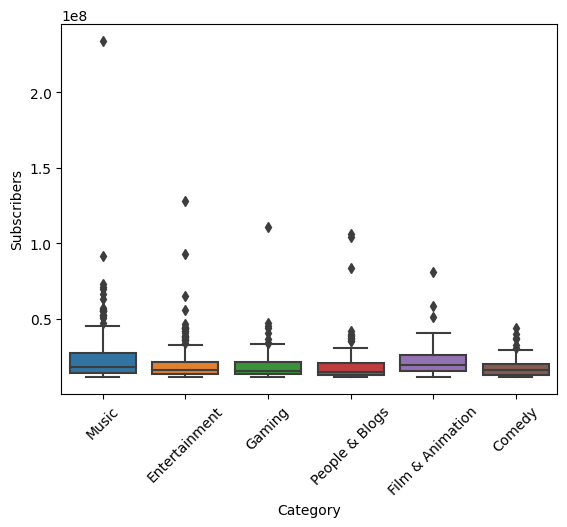

In [32]:
# box plot on category and subscribers, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='Subscribers', data=df2)

# music is in the top

<AxesSubplot: xlabel='Category', ylabel='views_per_sub'>

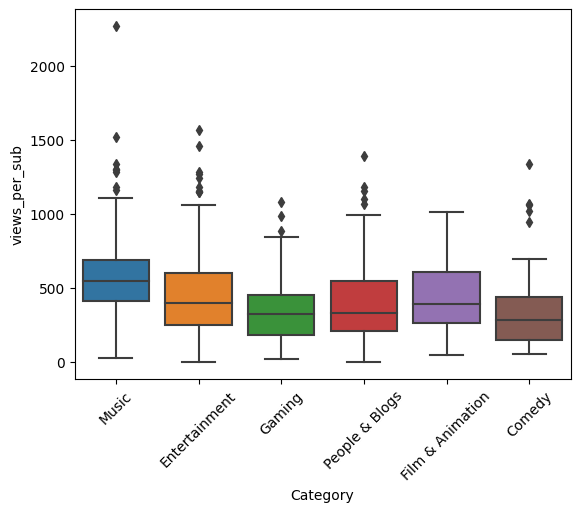

In [33]:
# box plot on category and views per subscribers, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='views_per_sub', data=df2)

<AxesSubplot: xlabel='Category', ylabel='Video Views'>

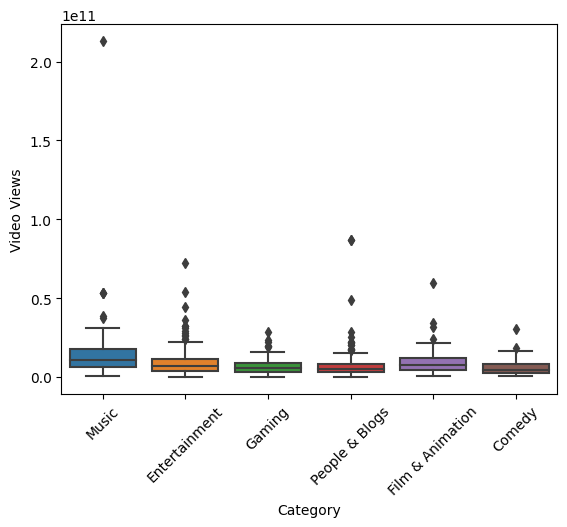

In [34]:
# box plot on category and video views, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='Video Views', data=df2)

# same info

<AxesSubplot: xlabel='Category', ylabel='Video Count'>

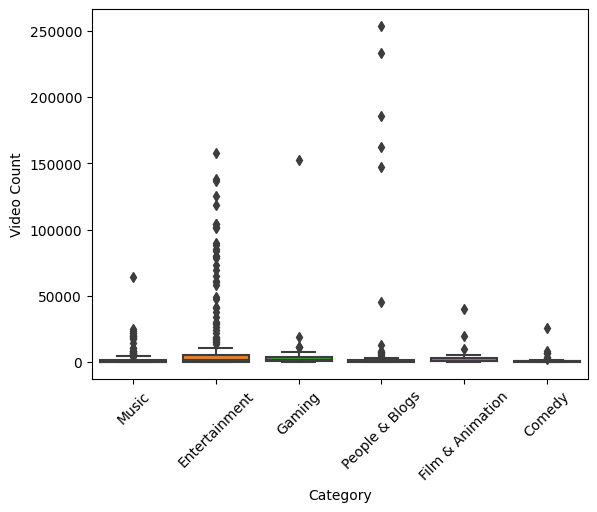

In [35]:
# box plot on category and video count, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='Category', y='Video Count', data=df2)

# The data reveals that there are more videos produced in the People & Blogs and Entertainment categories.

<AxesSubplot: xlabel='year_span', ylabel='Subscribers'>

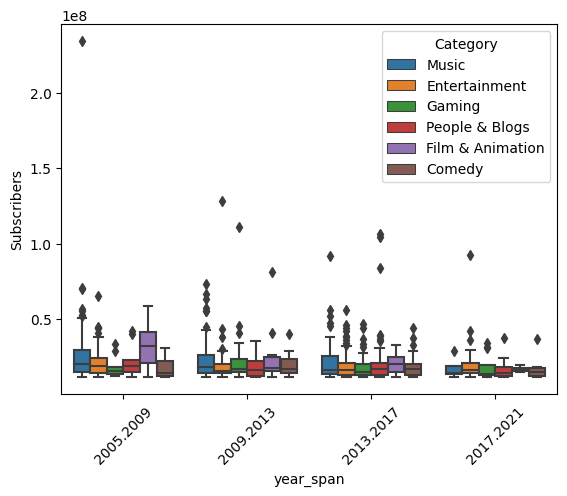

In [36]:
# box plot on year_span and subscribers, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='year_span', y='Subscribers', data=df2, hue='Category')

# same information

<AxesSubplot: xlabel='year_span', ylabel='Video Views'>

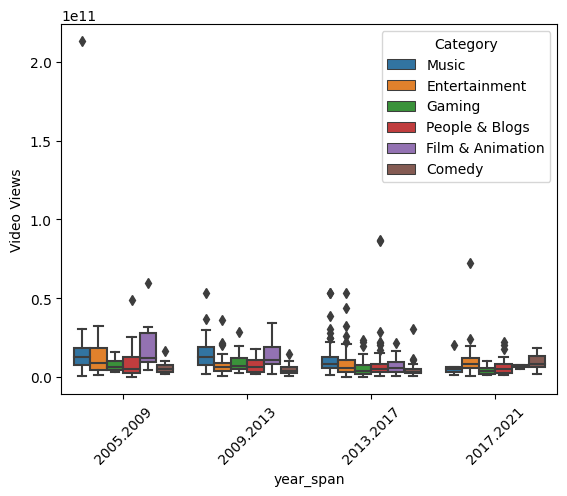

In [37]:
# box plot on year_span and video views, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='year_span', y='Video Views', data=df2, hue='Category')

# same

<AxesSubplot: xlabel='year_span', ylabel='Video Count'>

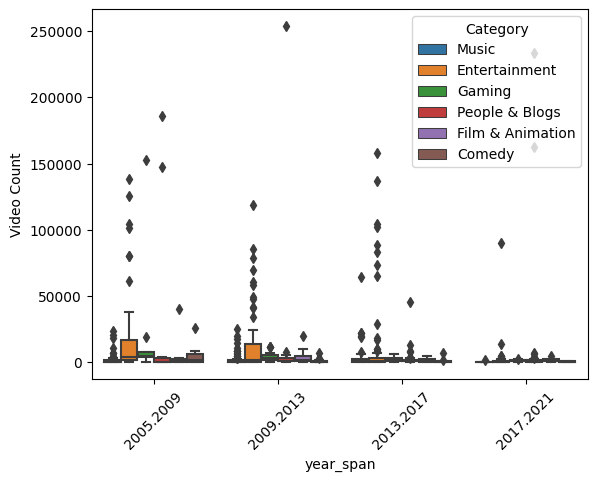

In [38]:
# box plot on year_span and video count, tilt bottom labels by 45 degrees
plt.xticks(rotation=45)
sns.boxplot(x='year_span', y='Video Count', data=df2, hue='Category')

# Over the years, the Entertainment category consistently produced more videos than any other category.

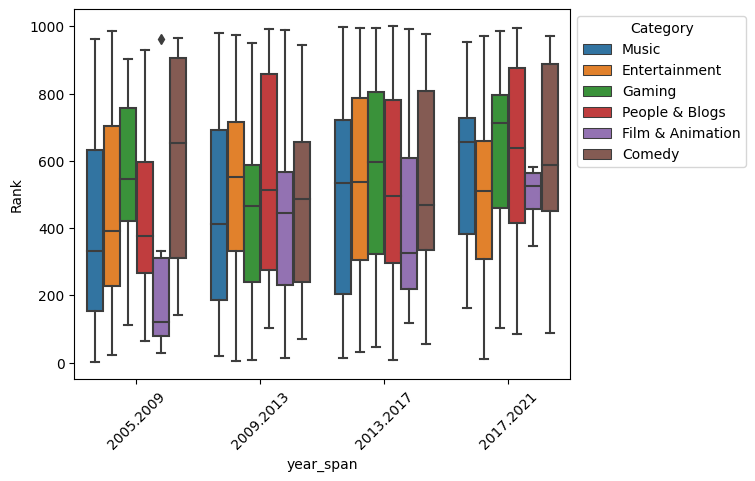

In [39]:
# box plot on year_span and rank, tilt bottom labels by 45 degrees
# also move the legend on the right side of data so it doesn't stand on top of the plot
plt.xticks(rotation=45)
ax = sns.boxplot(x='year_span', y='Rank', data=df2, hue='Category')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# this plot shows the succes of comedy category since 2009

<h4><b>seaborn plots - heatmaps for correlation matrices</b></h4>

<AxesSubplot: >

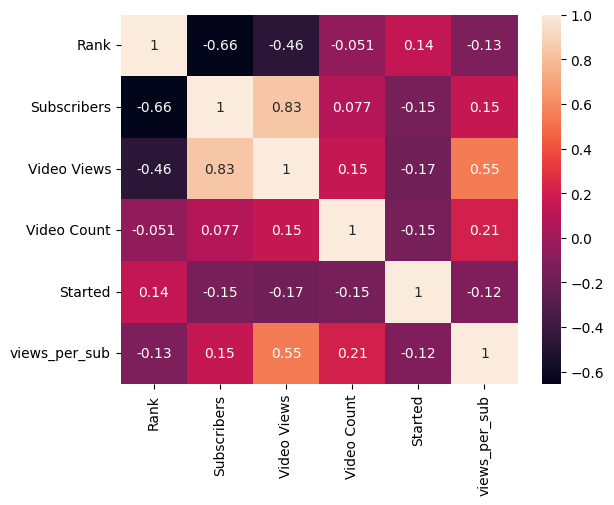

In [40]:
# basic heatmap for correlation matrix
sns.heatmap(correlations, annot=True)

# we have same plot yet

<AxesSubplot: >

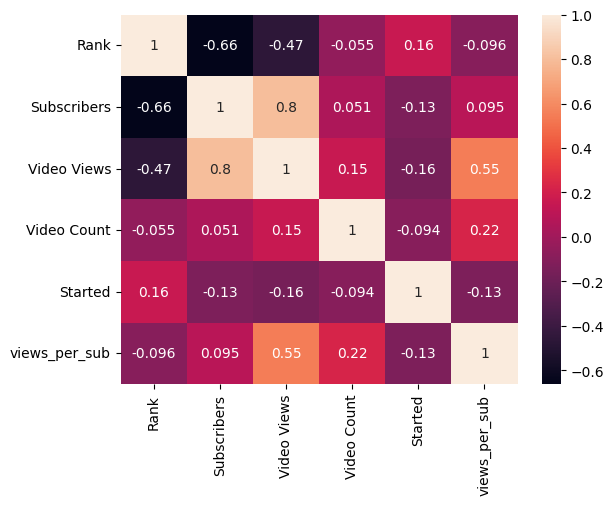

In [41]:
# basic heatmap for correlation matrix, only most popular categories
sns.heatmap(correlations2, annot=True)

# not useful